<b>Predictive Analysis on Bank Marketing Dataset :</b>

Bank Marketing Dataset contains both type variables 'Categorical' and 'Numerical'.

* Marital - (Married , Single , Divorced)",
* Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)
* Housing - (Yes/No)
* Loan - (Yes/No)
* Target - (Yes/No)
* Default - (Yes/No)


<b>Numerical Variable:</b>


*  Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

data=pd.read_csv("bank-full.csv")
data = data.drop(['day','poutcome'],axis=1)

def binaryType_(data):
    
    data.Target.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    #data.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
    data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    #data.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)
    
    return data

data = binaryType_(data)


data.head()


,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,0,2143,1,0,3,5,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,3,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,3,5,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,3,5,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,3,5,198,1,-1,0,0


In [2]:
data.describe()

,age,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,2.223707,6.144655,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,0.549747,2.408034,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,2.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,2.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,3.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,3.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


<b>Outlier</b>

Data_point > (Q3 * 1.5) is said to be outlier where Q3 is 75% Quantile !

<b>Age</b>

* Average age of the people in the dataset is ~41 with std of 10.61
   * Min. age is 18
   * Max. age is 95
   * quantile 75%(percentile) refers that 75 percentage of the people have 49 or less  age.
   * As 95 is max, there is great chance that its a outlier "49*(3/2) = 73.5". So anything greater than 73.5 is outlier.

<b>Balance:</b>

* Average balance of the people in the dataset is (approx)1528.53 with std of 3255.41, as standard deviation is quite huge it means that balance is wide spread across the dataset.
   * Min. balance is -6847
   * Max. balance is 81204
   * quantile 75%(percentile) refers that 75 percentage of the people have 1708 or less balance.
   * while comparing with 75% quantile, 81204 is very huge and its a outlier data point.


<b>Duration:</b>
    
* Average duration of the people speaking in the dataset is (approx)371 with std of 347, as standard deviation is quite huge it means that duration is wide spread across the dataset.
* Min. duration is 2
* Max. duration is 3881
* quantile 75%(percentile) refers that 75 percentage of the people spoke for 496 seconds or less.
* while comparing with 75% quantile, 3881 is a outlier data point.



<b>Campaign:</b>
    
* Average no. of contacts performed during the current campaign for a client in the dataset is (approx)2.50 with std of 2.72.
   * Min. balance is 1
   * Max. balance is 63
   * quantile 75%(percentile),for 75% of records, 3 times the client has been contacted in the current campaign for a client.
   * while comparing with 75% quantile,63 is a outlier data point.

<b>Previous:</b>
    
   * Average no. of contacts performed before this campaign for a client in the dataset is (approx)0.83 with std of 2.29.
   * Min. balance is 0.
   * Max. balance is 58
   * quantile 75%(percentile),for 75% of records, 1 times the client has been contacted before this campaign.
   * while comparing with 75% quantile,58 is a outlier data point.

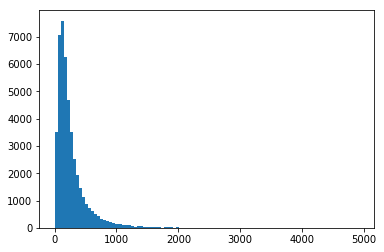

In [3]:
plt.hist((data.duration),bins=100)
plt.show()

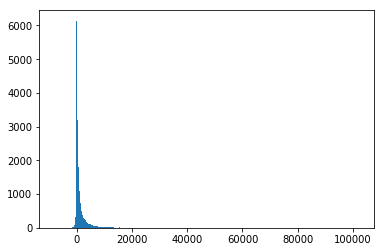

In [4]:
plt.hist(data.balance,bins=1000)
plt.show()

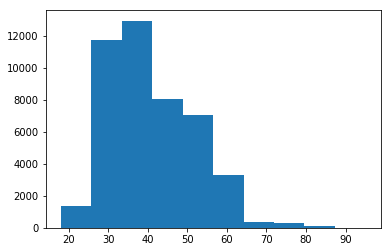

In [5]:
plt.hist(data.age,bins=10)
plt.show()

Above, All the Histogram suggest that data is skewed towards left i.e. existence of skewness brings us to a point that we need to sample the data efficiently while classifiying the train_data and test_data !

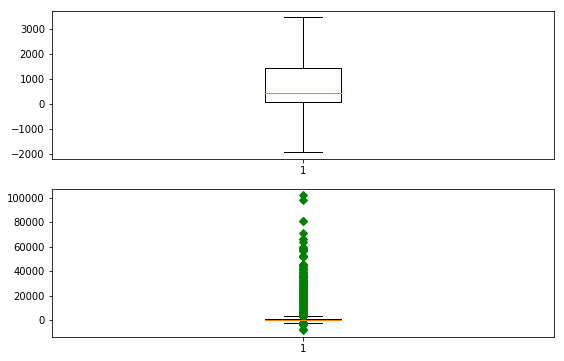

In [6]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(data.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(data.balance,0,'gD')
plt.show()

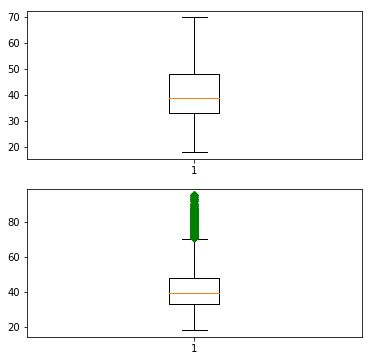

In [7]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(211)
bp = ax.boxplot(data.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(data.age,0,'gD')
plt.show()

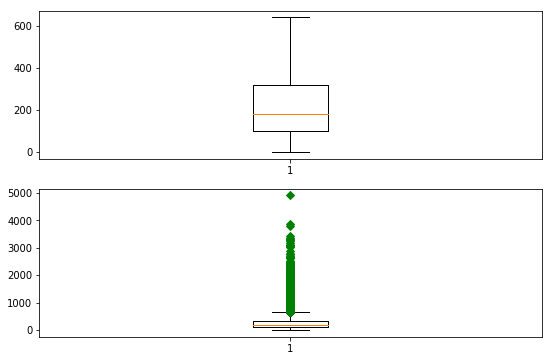

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(data.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(data.duration,0,'gD')
plt.show()

Above boxplot suggest how the data is spread across the dataset Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points.

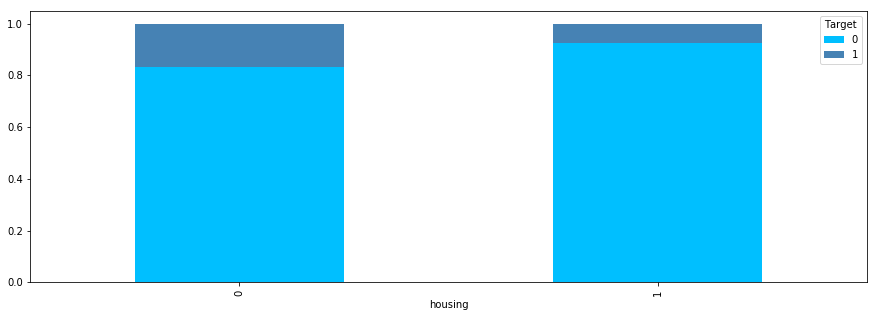

In [9]:
draw_data = pd.crosstab(data.housing, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

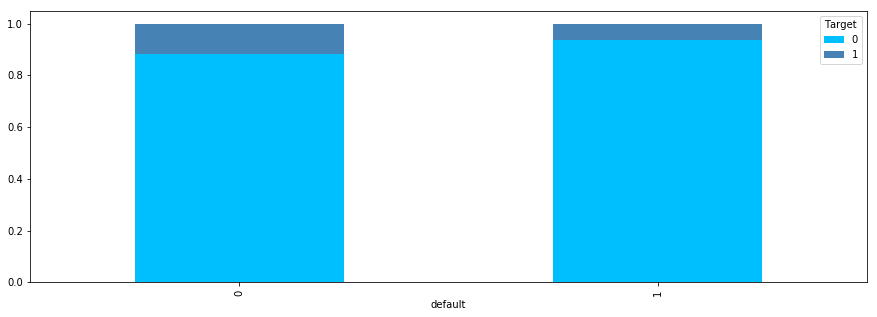

In [10]:
draw_data = pd.crosstab(data.default, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],
                                                           grid=False, figsize=(15, 5))
plt.show()


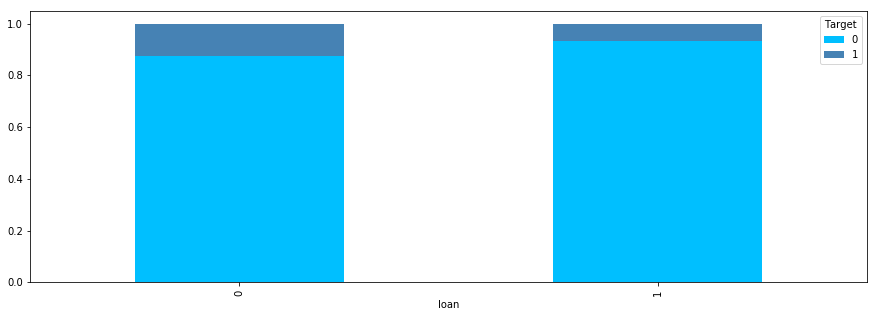

In [11]:
draw_data = pd.crosstab(data.loan, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

By looking at the bar graph, we can observe that Feature vs Label the data is wide spread i.e. we cannot predict completely based on feature alone. Feature Engineering

First, We can convert the duration from Seconds to Minutes and then making it as categorical feature.

Converting the age of the person into categorical feature by segregating the age as Adult , Middle Aged and old.

Similarly we can convert the continous feature value into discrete feature value.

In [12]:
def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0    
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    #data.loc[(data['age'] <= 60) & (data['age'] >= 46),'Elderly'] = 1
    data.loc[data['age'] >=61,'old'] = 1
    
    return data

def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data

def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data

def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data

data = campaign_(data)
data = age_(data)
data = education_(data)
data = balance_(data)
data = job_(data)
data = previous_(data)
data = duration_(data)
data = pdays_(data)
data = marital_(data)
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'Adult', 'Middle_Aged', 'old', 'primary', 'secondary',
       'tertiary', 'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance',
       'Not_Contacted', 'Contacted', 't_min', 't_e_min', 'e_min',
       'pdays_not_contacted', 'months_passed', 'married', 'singles',
       'divorced'],
      dtype='object')


<b>Plotting bar chart :</b>

<b>data.Adult vs data.Target :</b>

The data is spread equally opting for term deposit or not.

<b>data.Middle_Aged vs data.Target :</b>
    
    The data is pointing out that people opt less for term deposit.

<b>data.old vs data.Target :</b>

The data is points out that people opt more for term deposit as it covers people who are retired.

<b>data.t_min vs data.Target :</b>

The data point brings out the fact that if the client is less interested in enrolling for term deposit, he/she is ready to invest less time on call with the agent.

Note : t_min - Five minutes or less

<b>data.t_e_min vs data.Target :</b>

The data points brings out the fact that if the client is interested in enrolling for term deposit, he/she is ready to investing minimum of 5 to 10 minute time on call with the agent.

Note : t_e_min - greater than Five minutes or more

<b>data.e_min vs data.Target :</b>

The data points suggest that if the client is very much interested in enrolling for term deposit, he/she is ready to investing more than 10 minute of time on call with the agent.

Note : e_min - greater than ten minutes or more

<b>data.pdays_not_contacted vs data.Target :</b>

The data points refers to the client who were not contacted in the previous campaign.And it looks like the people are contaced in current campaign are not contacted previously.

<b>data.months_passed vs data.Target :</b>

The data points refers to the months passed after the client has been contacted before the current campaign.

<b>data.Contacted vs data.Target :</b>

The data points refers to the no. of times a client has been contacted before this campaign.Fewer no. of contacts are more likely to enroll for term deposit

<b>data.not_Contacted vs data.Target :</b>

The data points refers that no contact is made for a client before this campaign. Not contacted Clients are less likely to enroll for term Target

<b>data.Pos_Balance vs data.Target :</b>

Here, We can clearly see as the balance in the account increases the no. of client enrolling for the term deposit is more and more.

<b>data.No_Balance vs data.Target :</b>

Here, We can see as the balance in the account is zero, the no. of client enrolling for the term deposit are less.

<b>data.Neg_Balance vs data.Target :</b>

We can infer that as the balance in the account is -ve, the no. of client enrolling for the term deposit are very less and feature come in place while classifying such data points

<b>data.campaign vs data.Target :</b>

The data points refers that no. of contact made to a client in this campaign. If a client is contacted once or twice are more likely to enroll than clients who are contacted more than 3 times.


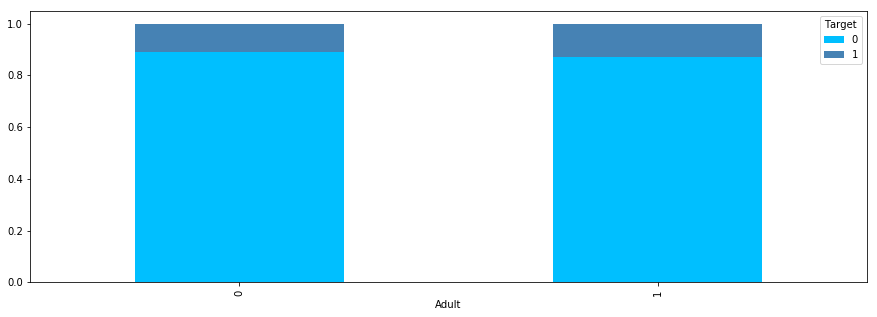

In [13]:
draw_data = pd.crosstab(data.Adult, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

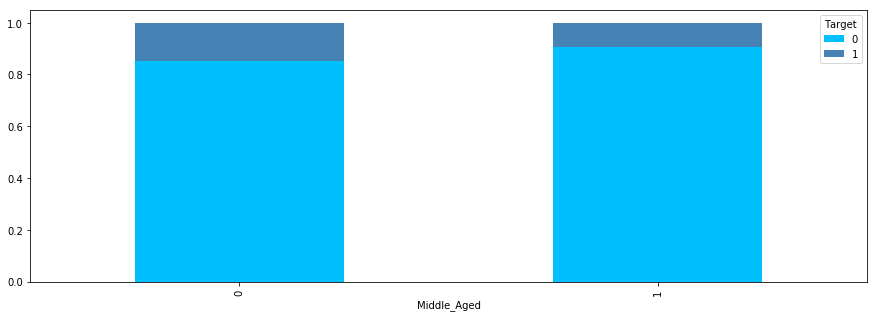

In [14]:
draw_data = pd.crosstab(data.Middle_Aged, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()


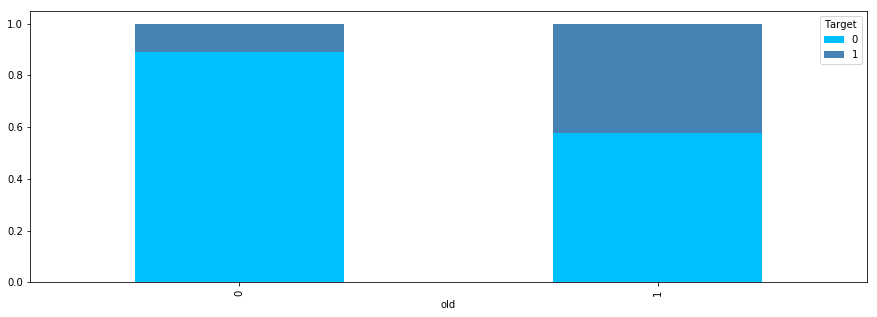

In [15]:
draw_data = pd.crosstab(data.old, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

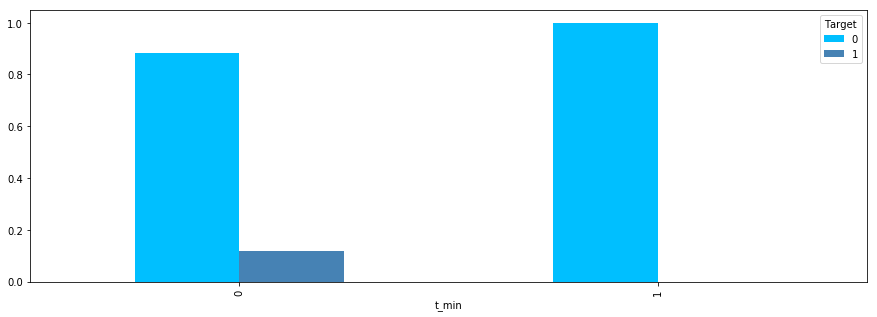

In [16]:
draw_data = pd.crosstab(data.t_min, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

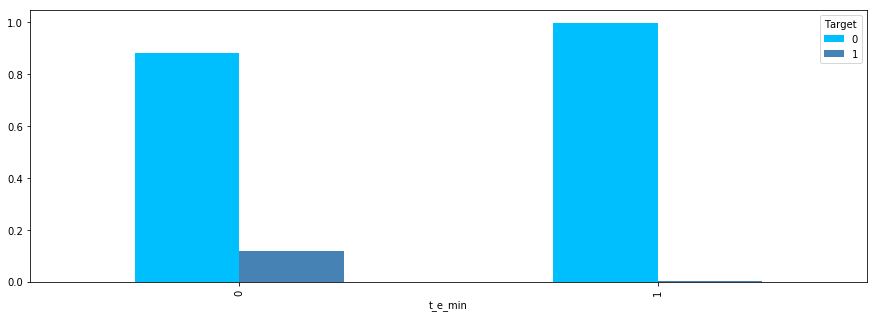

In [17]:
draw_data = pd.crosstab(data.t_e_min, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

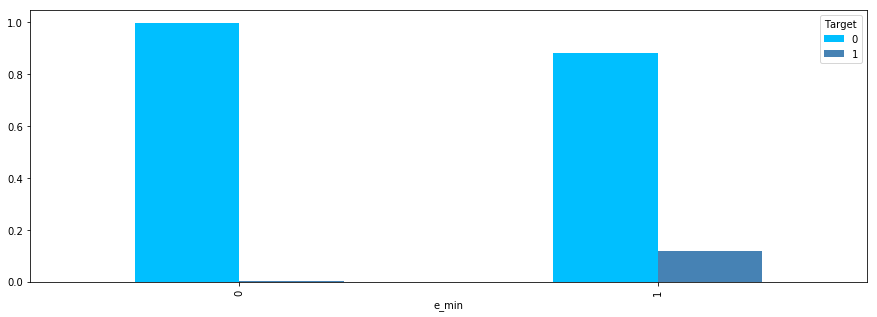

In [18]:
draw_data = pd.crosstab(data.e_min, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

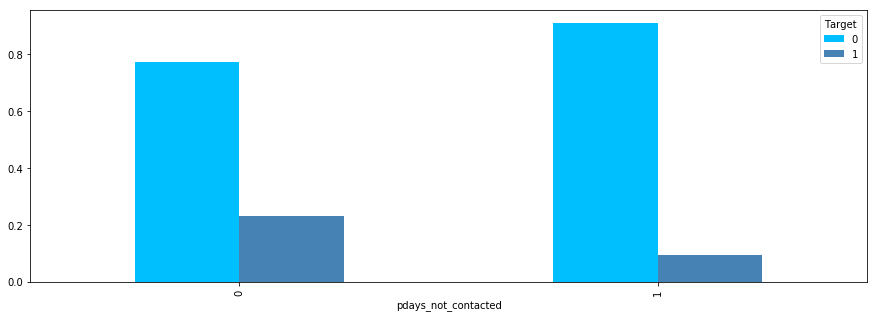

In [19]:
draw_data = pd.crosstab(data.pdays_not_contacted, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

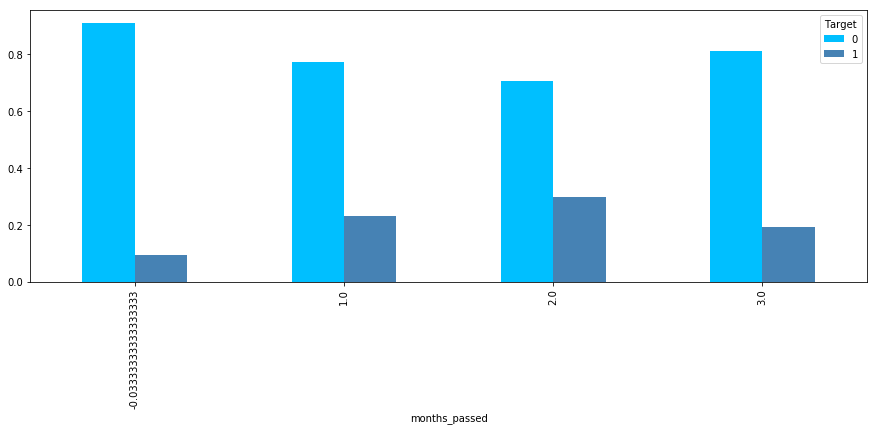

In [20]:
draw_data = pd.crosstab(data.months_passed, data.Target)
draw_data.div(draw_data.sum(1).astype(int), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

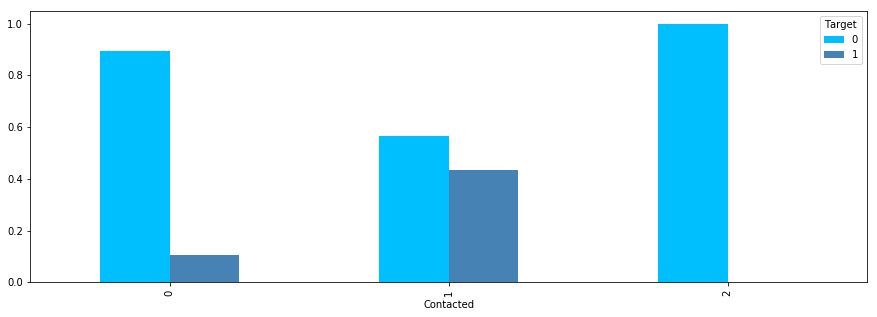

In [21]:
draw_data = pd.crosstab(data.Contacted, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

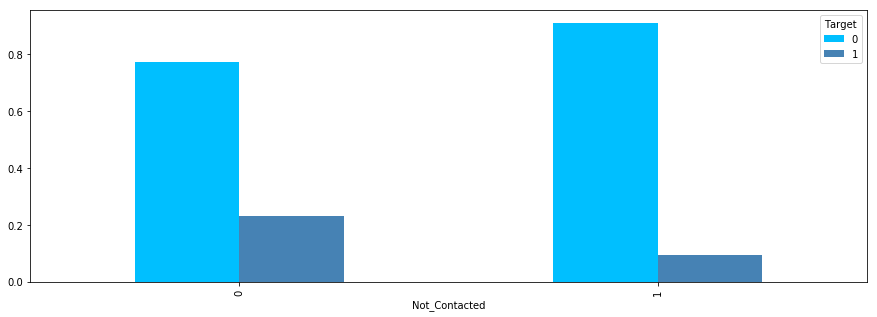

In [22]:
draw_data = pd.crosstab(data.Not_Contacted, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

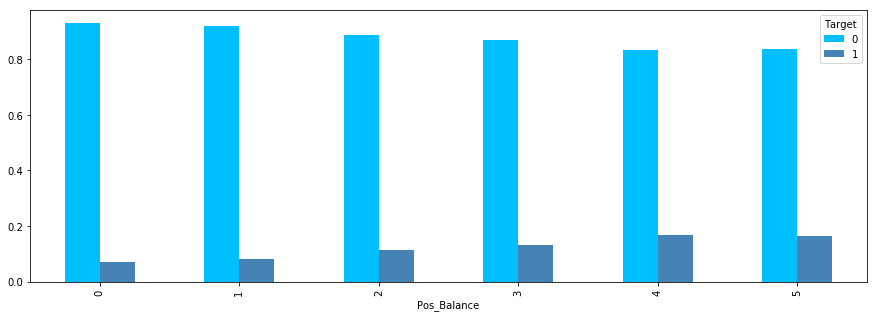

In [23]:
draw_data = pd.crosstab(data.Pos_Balance, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

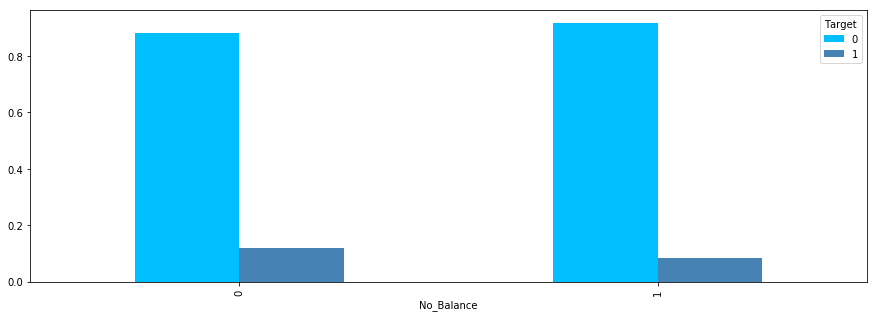

In [24]:
draw_data = pd.crosstab(data.No_Balance, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

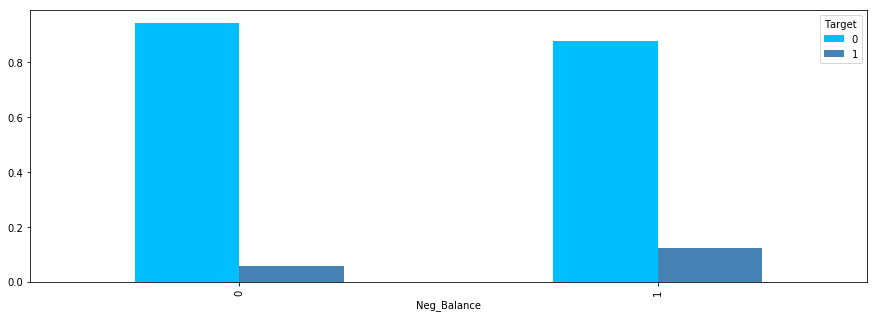

In [25]:
draw_data = pd.crosstab(data.Neg_Balance, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

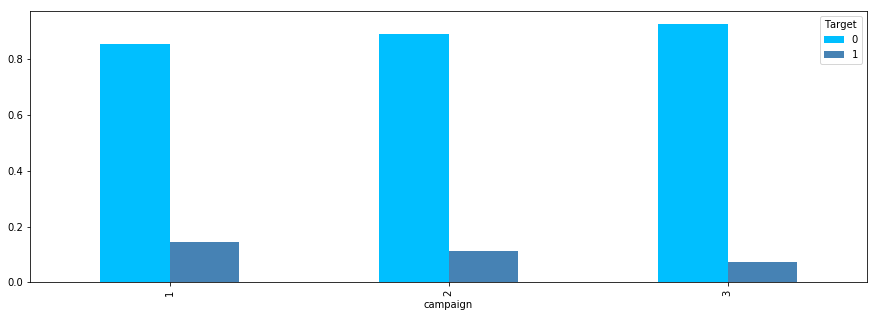

In [26]:
draw_data = pd.crosstab(data.campaign, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

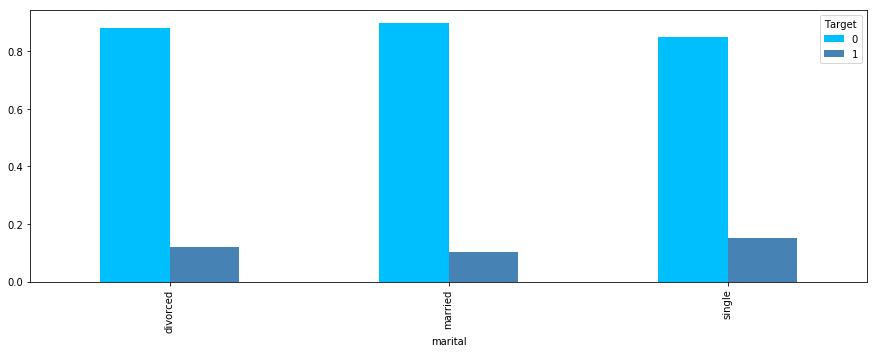

In [27]:
draw_data = pd.crosstab(data.marital, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

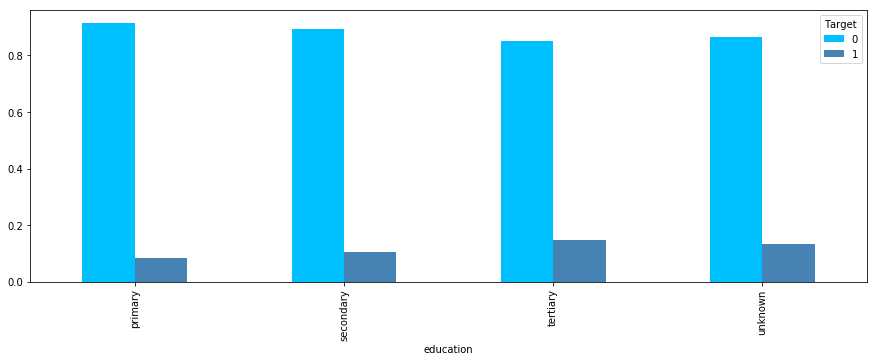

In [28]:
draw_data = pd.crosstab(data.education, data.Target)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

Classifiers : Based on the values of different parameters we can conclude to the following classifiers for Binary Classification.

Gradient Boosting
AdaBoosting
Random Forest Classifier
DecisionTree Classifier

And performance metric using precision and recall calculation along with roc_auc_score & accuracy_score

In [29]:
classifiers = {'Logistic Regression':LogisticRegression(),'K Nearest Neighbour':KNeighborsClassifier(8),
               'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'Gradient Boost Classifier with HyperParamters tuning':GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1200,min_samples_leaf=50, subsample=0.85, random_state=10, max_features=7),
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Adaptive Boost Classifier with Hyperparameters':AdaBoostClassifier(n_estimators=250),
               'Random Forest Classifier': RandomForestClassifier(),
              'Random Forest Classifier With HyperParameters tuning': RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1), 
               'Decision Tree Classifier':DecisionTreeClassifier(),
              'Decision Tree Classifier with Hyperparameters tuning':DecisionTreeClassifier(min_samples_leaf=50, max_depth=9, max_features=7, criterion='gini')}

In [30]:
data_y = pd.DataFrame(data['Target'])
data_X = data.drop(['Target','balance','previous','pdays','age','duration','education','marital'],axis=1)
print(data_X.columns)
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]

log = pd.DataFrame(columns=log_cols)

Index(['job', 'default', 'housing', 'loan', 'contact', 'month', 'campaign',
       'Adult', 'Middle_Aged', 'old', 'primary', 'secondary', 'tertiary',
       'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance', 'Not_Contacted',
       'Contacted', 't_min', 't_e_min', 'e_min', 'pdays_not_contacted',
       'months_passed', 'married', 'singles', 'divorced'],
      dtype='object')


                                          Classifier  Accuracy  \
0                                Logistic Regression  0.883888   
0                                Logistic Regression  0.883335   
0                                K Nearest Neighbour  0.882229   
0                                K Nearest Neighbour  0.884883   
0                       Gradient Boosting Classifier  0.885657   
0                       Gradient Boosting Classifier  0.885879   
0  Gradient Boost Classifier with HyperParamters ...  0.885657   
0  Gradient Boost Classifier with HyperParamters ...  0.884883   
0                       Adaptive Boosting Classifier  0.884773   
0                       Adaptive Boosting Classifier  0.883003   
0     Adaptive Boost Classifier with Hyperparameters  0.883888   
0     Adaptive Boost Classifier with Hyperparameters  0.884330   
0                           Random Forest Classifier  0.868517   
0                           Random Forest Classifier  0.868738   
0  Random 

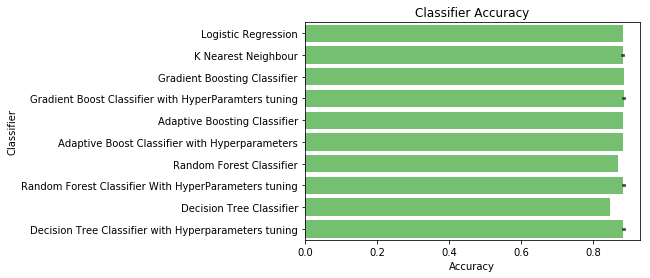

In [31]:
import warnings
warnings.filterwarnings('ignore')
rs = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=0)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
   
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)        
        log = log.append(log_entry)
        
        
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

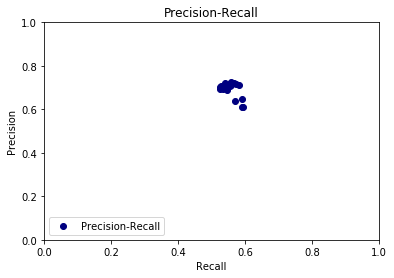

In [32]:
plt.scatter(log['Recall Score'], log['Precision Score'], color='navy',
         label='Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()

                                          Classifier  Accuracy  \
0                                Logistic Regression  0.883888   
0                                Logistic Regression  0.883335   
0                                K Nearest Neighbour  0.882229   
0                                K Nearest Neighbour  0.884883   
0                       Gradient Boosting Classifier  0.885657   
0                       Gradient Boosting Classifier  0.885879   
0  Gradient Boost Classifier with HyperParamters ...  0.885657   
0  Gradient Boost Classifier with HyperParamters ...  0.884883   
0                       Adaptive Boosting Classifier  0.884773   
0                       Adaptive Boosting Classifier  0.883003   
0     Adaptive Boost Classifier with Hyperparameters  0.883888   
0     Adaptive Boost Classifier with Hyperparameters  0.884330   
0                           Random Forest Classifier  0.868517   
0                           Random Forest Classifier  0.868738   
0  Random 

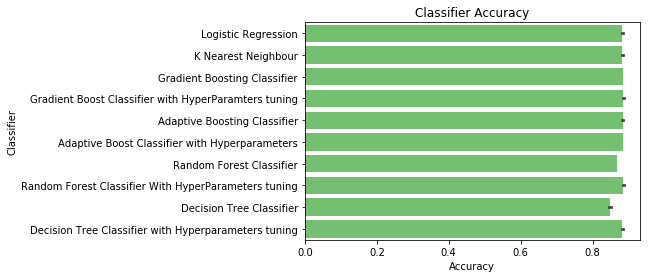

In [33]:
import warnings
warnings.filterwarnings('ignore')
rs = ShuffleSplit(n_splits=1, test_size=0.2,random_state=0)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
        
        log = log.append(log_entry)
        
    
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

<b>Inference:</b>
    
    Gradient Boosting Classifier seems to be a better fit when comparing the  models without hyperparameters tuning.
    When hyperparameters tuning is done, RandomForest and DecsionTree Classifiers seem to have improved in results by 0.02 and 0.03 respectively and RandomForest Classifier seems to have bettered the Gradient Boost Classifier as well.
    